In [1]:
import pandas as pd
pd.options.display.float_format = '{:.2f}'.format #turn off scientific notation
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook
from scipy.stats import linregress
import scipy.stats as stats
plt.rcParams.update({'figure.max_open_warning': 0}) #turns off warning for too many plots

## Read Cleaned Zillow Data

In [2]:
#read Zillow 3 bedroom data by county into pandas dataframe 
file = "output files/zillow_clean_df.csv" 
zillow_df = pd.read_csv(file, index_col = 0) 
#zillow_df = pd.read_csv(file) 
zillow_df.head()

,Los Angeles County,Fresno County,San Francisco County,Shasta County
2014 Avg Price,456951.25,180313.22,1194854.92,202065.47
2015 Avg Price,482374.33,191649.06,1292884.22,216334.31
2016 Avg Price,518062.94,203774.64,1388945.64,226238.28
2017 Avg Price,555362.75,220687.50,1471771.03,241436.89
2018 Avg Price,596094.53,238799.28,1620575.75,253039.00


## Read Income Data

In [3]:
income_df=pd.read_csv("output files/income_df.csv", index_col = 0) 
income_df.head()

,Los Angeles County,Fresno County,San Francisco County,Shasta County
2014 Income,50730,36448,97498,38410
2015 Income,53521,38323,103529,40882
2016 Income,57127,40327,114697,43412
2017 Income,59058,41137,121778,44480
2018 Income,62224,43084,130696,46582


## Plot Income vs. Housing Data, 4 counties

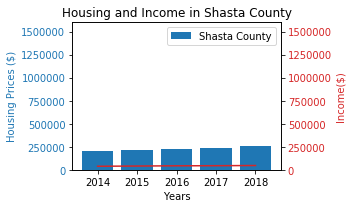

In [4]:
#plot Shasta income and housing price with 2 y axis
x=[2014, 2015, 2016, 2017, 2018]
y1line = zillow_df.loc[:,"Shasta County"]
y2bar = income_df.loc[:, "Shasta County"]

fig, ax1 = plt.subplots(figsize=(5,3))

color = 'tab:blue'
ax1.set_xlabel('Years')
ax1.set_ylim(0, 1600000)
ax1.set_ylabel('Housing Prices ($)', color=color)
ax1.set_title('Housing and Income in Shasta County')
ax1.bar(x, y1line, color=color) 
ax1.tick_params(axis='y', labelcolor=color)
ax1.legend(['Shasta County'], facecolor='w')

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
ax2.set_ylim(0, 1600000) #set limit on second axis to same scale as first axis
color = 'tab:red'
ax2.set_ylabel('Income($)', color=color)  # we already handled the x-label with ax1
ax2.plot(x, y2bar, color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.savefig("IncomandHousingPricesinShastaCounty.png")
plt.show()

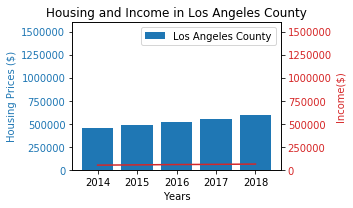

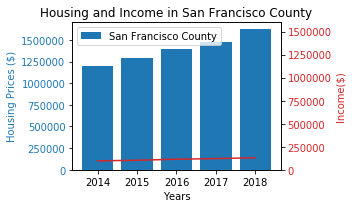

In [5]:
#plot LA income and housing price with 2 y axis
x=[2014, 2015, 2016, 2017, 2018]
y1line = zillow_df.loc[:,"Los Angeles County"]
y2bar = income_df.loc[:, "Los Angeles County"]

fig, ax1 = plt.subplots(figsize=(5,3))

color = 'tab:blue'
ax1.set_xlabel('Years')
ax1.set_ylim(0, 1600000)
ax1.set_ylabel('Housing Prices ($)', color=color)
ax1.set_title('Housing and Income in Los Angeles County')
ax1.bar(x, y1line, color=color) 
ax1.tick_params(axis='y', labelcolor=color)
ax1.legend(['Los Angeles County'], facecolor='w')

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
ax2.set_ylim(0, 1600000) #set limit on second axis to same scale as first axis
color = 'tab:red'
ax2.set_ylabel('Income($)', color=color)  # we already handled the x-label with ax1
ax2.plot(x, y2bar, color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.savefig("output images/Income_HousingPrices_LACounty.png")
plt.show()

#plot SF income and housing price with 2 y axis
fig, ax1 = plt.subplots(figsize=(5,3))

y1line = zillow_df.loc[:,"San Francisco County"]
y2bar = income_df.loc[:, "San Francisco County"]
color = 'tab:blue'
ax1.set_xlabel('Years')
ax1.set_ylabel('Housing Prices ($)', color=color)
ax1.set_title('Housing and Income in San Francisco County')
ax1.bar(x, y1line, color=color) 
ax1.tick_params(axis='y', labelcolor=color)
ax1.legend(['San Francisco County'], facecolor='w')

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
ax2.set_ylim(0, 1600000) #set limit on second axis to same scale as first axis
color = 'tab:red'
ax2.set_ylabel('Income($)', color=color)  # we already handled the x-label with ax1
ax2.plot(x, y2bar, color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.savefig("output images/Income_HousingPrices_SFCounty.png")
plt.show()

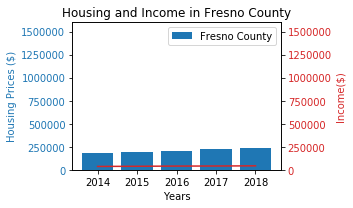

In [6]:
#plot Fresno income and housing price with 2 y axis
x=[2014, 2015, 2016, 2017, 2018]
y1line = zillow_df.loc[:,"Fresno County"]
y2bar = income_df.loc[:, "Fresno County"]

fig, ax1 = plt.subplots(figsize=(5,3))

color = 'tab:blue'
ax1.set_xlabel('Years')
ax1.set_ylim(0, 1600000)
ax1.set_ylabel('Housing Prices ($)', color=color)
ax1.set_title('Housing and Income in Fresno County')
ax1.bar(x, y1line, color=color) 
ax1.tick_params(axis='y', labelcolor=color)
ax1.legend(['Fresno County'], facecolor='w')

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
ax2.set_ylim(0, 1600000) #set limit on second axis to same scale as first axis
color = 'tab:red'
ax2.set_ylabel('Income($)', color=color)  # we already handled the x-label with ax1
ax2.plot(x, y2bar, color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.savefig("output images/Income_HousingPrices_FresnoCounty.png")
plt.show()

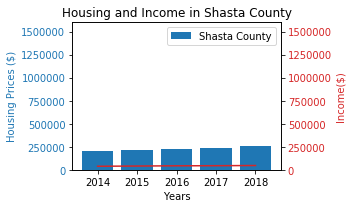

In [7]:
#plot Shasta income and housing price with 2 y axis
x=[2014, 2015, 2016, 2017, 2018]
y1line = zillow_df.loc[:,"Shasta County"]
y2bar = income_df.loc[:, "Shasta County"]

fig, ax1 = plt.subplots(figsize=(5,3))

color = 'tab:blue'
ax1.set_xlabel('Years')
ax1.set_ylim(0, 1600000)
ax1.set_ylabel('Housing Prices ($)', color=color)
ax1.set_title('Housing and Income in Shasta County')
ax1.bar(x, y1line, color=color) 
ax1.tick_params(axis='y', labelcolor=color)
ax1.legend(['Shasta County'], facecolor='w')

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
ax2.set_ylim(0, 1600000) #set limit on second axis to same scale as first axis
color = 'tab:red'
ax2.set_ylabel('Income($)', color=color)  # we already handled the x-label with ax1
ax2.plot(x, y2bar, color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.savefig("output images/Income_HousingPrices_ShastaCounty.png")
plt.show()

## Plot Income vs. Housing Price Scatter - all CA counties for 2018

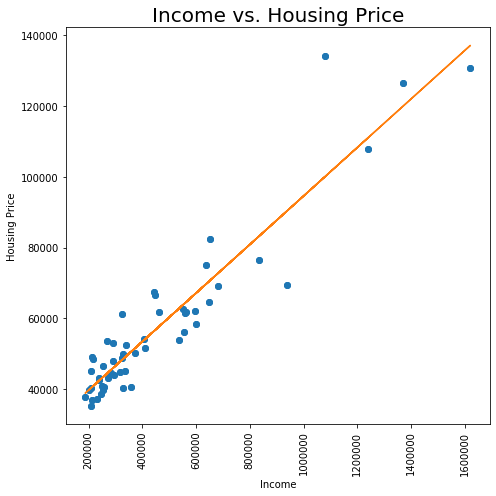

p_value: 5.92e-25
r_value: 0.94


In [8]:
#We want to explore the relationship between housing prices and income for all CA counties for 2018
# Show linear relationship between Income and Housing Price

#read data files
zillow_clean_all_counties_df = pd.read_csv("output files/zillow_clean_all_counties_df.csv")
all_counties_income_df = pd.read_csv("output files/all_counties_income.csv", )

#merge income and housing into one table
income_housing_2018_df = pd.merge(zillow_clean_all_counties_df, all_counties_income_df, on="RegionName", how = "inner")
#rename column
income_housing_2018_df= income_housing_2018_df.rename(columns={"RegionName":"County"})
income_housing_2018_df

#plot scatter
fig, ax1 = plt.subplots(figsize=(7,7))
x = income_housing_2018_df["Price"]
y = income_housing_2018_df["Income"]
ax1.scatter(x, y)
plt.xticks(rotation=90)

#plot regression
slope, intercept, r_value, p_value, slope_std_error = stats.linregress(x,y)
predict_y = slope * x + intercept
plt.plot(x, y, "o")
plt.plot(x, predict_y)


ax1.set_xlabel("Income")
ax1.set_ylabel("Housing Price")
ax1.set_title("Income vs. Housing Price", size = 20)

fig.tight_layout()
plt.savefig ("output images/Income_Housing_Scatter_Regression.png")
plt.show()

#round the r-value (correlation coefficient) and p-value
p_value = '{:0.2e}'.format(p_value)
r_value = '{:0.2}'.format(r_value)

print(f"p_value: {p_value}")
print(f"r_value: {r_value}")

## Read Rental Data

In [9]:
#Read Rental Data 
rental_df = pd.read_csv("output files/rentals4counties.csv", index_col = 0)
rental_df.head()

,Los Angeles County,San Francisco County,Fresno County,Shasta County
0,,,,
Average 2014 Rentals,2376.25,5374.17,1106.04,1161.25
Average 2015 Rentals,2711.67,5978.54,1180.00,1243.12
Average 2016 Rentals,2827.50,5685.04,1239.58,1250.42
Average 2017 Rentals,3020.42,5446.25,1337.71,1300.42
Average 2018 Rentals,3121.62,5498.58,1424.38,1390.42


## Plot Rental vs. Housing Data, 4 counties

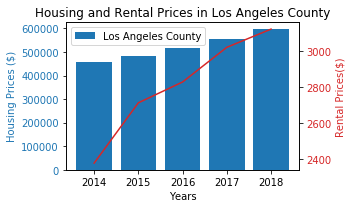

In [10]:
#plot LA rental and housing price with 2 y axis
x= ['2014','2015', '2016', '2017', '2018']
y1line = zillow_df["Los Angeles County"]
y2bar = rental_df["Los Angeles County"]

fig, ax1 = plt.subplots(figsize=(5,3))

color = 'tab:blue'
ax1.set_xlabel('Years')
ax1.set_ylabel('Housing Prices ($)', color=color)
ax1.set_title('Housing and Rental Prices in Los Angeles County')
ax1.bar(x, y1line, color=color)
ax1.tick_params(axis='y', labelcolor=color)
ax1.legend(['Los Angeles County'], facecolor='w')
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:red'
ax2.set_ylabel('Rental Prices($)', color=color)  # we already handled the x-label with ax1
ax2.plot(x, y2bar, color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.savefig("output images/Rental_HousingPricesi_LACounty.png")
plt.show()

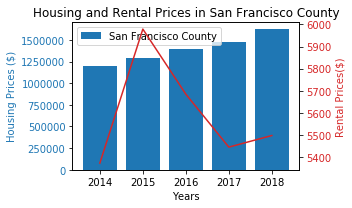

In [11]:
#plot San Francisco rental and housing price with 2 y axis
x= ['2014','2015', '2016', '2017', '2018']
y1line = zillow_df["San Francisco County"]
y2bar = rental_df["San Francisco County"]

fig, ax1 = plt.subplots(figsize=(5,3))

color = 'tab:blue'
ax1.set_xlabel('Years')
ax1.set_ylabel('Housing Prices ($)', color=color)
ax1.set_title('Housing and Rental Prices in San Francisco County')
ax1.bar(x, y1line, color=color)
ax1.tick_params(axis='y', labelcolor=color)
ax1.legend(['San Francisco County'], facecolor='w')
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:red'
ax2.set_ylabel('Rental Prices($)', color=color)  # we already handled the x-label with ax1
ax2.plot(x, y2bar, color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.savefig("output images/Rental_HousingPricesi_SFCounty.png")
plt.show()

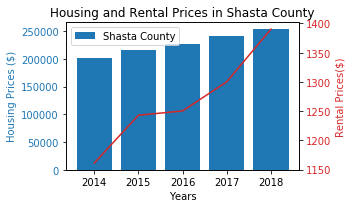

In [12]:
#plot LA rental and housing price with 2 y axis
x= ['2014','2015', '2016', '2017', '2018']
y1line = zillow_df["Shasta County"]
y2bar = rental_df["Shasta County"]

fig, ax1 = plt.subplots(figsize=(5,3))

color = 'tab:blue'
ax1.set_xlabel('Years')
ax1.set_ylabel('Housing Prices ($)', color=color)
ax1.bar(x, y1line, color=color)
ax1.tick_params(axis='y', labelcolor=color)
ax1.legend(['Shasta County'], facecolor='w')
ax1.set_title('Housing and Rental Prices in Shasta County')
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:red'
ax2.set_ylabel('Rental Prices($)', color=color)  # we already handled the x-label with ax1
ax2.plot(x, y2bar, color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.savefig("output images/Rental_HousingPrices_ShastaCounty.png")
plt.show()

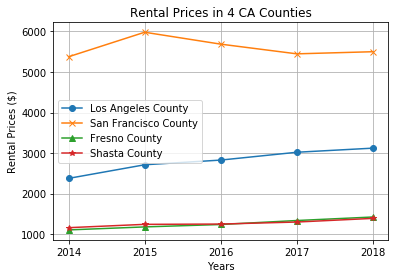

In [13]:
x= ['2014','2015', '2016', '2017', '2018']

fig, ax1 = plt.subplots()
plt.plot(x, rental_df["Los Angeles County"], marker="o", label = "Los Angeles County")
plt.plot(x, rental_df["San Francisco County"], marker="x", label = "San Francisco County")
plt.plot(x, rental_df["Fresno County"], marker="^", label = "Fresno County")
plt.plot(x, rental_df ["Shasta County"], marker="*", label = "Shasta County")


# Incorporate the other graph properties
plt.title("Rental Prices in 4 CA Counties")
plt.ylabel("Rental Prices ($)")
plt.xlabel("Years")
plt.grid(True)
plt.legend(loc="best")

#plt.xlim(0,4)
#plt.ylim(950,6500)
#plt.figure(figsize=(20,10))



# Save the figure
plt.savefig("output images/Rental_Prices_4Counties.png")

# Show plot
plt.show()

## Rental averages for 4 counties

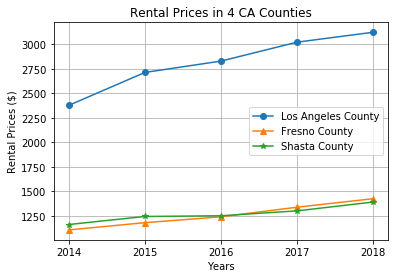

In [14]:
x= ['2014','2015', '2016', '2017', '2018']
plt.plot(x, rental_df["Los Angeles County"], marker="o", label = "Los Angeles County")
#plt.plot(x, rental_df["San Francisco County"], marker="x", label = "San Francisco County")
plt.plot(x, rental_df["Fresno County"], marker="^", label = "Fresno County")
plt.plot(x, rental_df["Shasta County"], marker="*", label = "Shasta County")

# Incorporate the other graph properties
plt.title("Rental Prices in 4 CA Counties")
plt.ylabel("Rental Prices ($)")
plt.xlabel("Years")
plt.grid(True)
plt.legend(loc="best")

#plt.xlim(0,4)
#plt.ylim(950,6500)
#plt.figure(figsize=(20,10))

plt.savefig("output images/Rental_Prices_4Counties.png")
plt.show()

## ANOVA and t Test

In [15]:
#compare rental data
group1 = rental_df["Los Angeles County"] 
group2 = rental_df["San Francisco County"]
group3 = rental_df["Shasta County"]
group4 = rental_df["Fresno County"]

ANOVA shows p value to be significant

In [16]:
stats.f_oneway(group1, group2, group3, group4)

F_onewayResult(statistic=500.9461360052821, pvalue=5.039318988502746e-16)

t Test shows significance between LA and Shasta and San Francisco rental prices means they are different but Fresno and Shasta are not different

In [17]:
stats.ttest_ind(group2, group3, equal_var=False)

Ttest_indResult(statistic=37.68337349106659, pvalue=2.7989971256772566e-07)

In [18]:
stats.ttest_ind(group1, group3, equal_var=False)

Ttest_indResult(statistic=11.372907286194094, pvalue=0.00014098256766199814)

In [19]:
stats.ttest_ind(group3, group4, equal_var=False)

Ttest_indResult(statistic=0.17087855216510933, pvalue=0.8691693277893662)

In [20]:
stats.ttest_ind(group1, group2, equal_var=False)

Ttest_indResult(statistic=-16.42690622372465, pvalue=2.681567814305284e-07)

In [21]:
stats.ttest_ind(group1, group4, equal_var=False)

Ttest_indResult(statistic=10.946615634798597, pvalue=6.494719904989934e-05)

In [22]:
stats.ttest_ind(group2, group4, equal_var=False)

Ttest_indResult(statistic=35.49046671080653, pvalue=3.2394593422615825e-08)

## Plot Rental vs. Housing Price Scatter - all CA counties for 2018

In [23]:
#read housing rental for all CA counties, 2018
counties2018_df = pd.read_csv("output files/rentals_all_counties_2018.csv")
counties2018_df.head()

,RegionName,State,2018-01,2018-02,2018-03,2018-04,2018-05,2018-06,2018-07,2018-08,2018-09,2018-10,2018-11,2018-12,Average 2018 Rentals
0,Los Angeles County,CA,3000.00,3000.00,3000.00,3100.00,3150.00,3195.00,3195.00,3200.00,3133.50,3141.00,3195.00,3150.00,3121.62
1,San Diego County,CA,2700.00,2700.00,2750.00,2800.00,2800.00,2800.00,2850.00,2850.00,2800.00,2765.00,2750.00,2800.00,2780.42
2,Orange County,CA,3150.00,3195.00,3195.00,3200.00,3200.00,3200.00,3195.00,3150.00,3195.00,3200.00,3195.00,3200.00,3189.58
3,Riverside County,CA,1995.00,2003.50,2050.00,2100.00,2100.00,2095.00,2095.00,2099.00,2100.00,2150.00,2175.00,2150.00,2092.71
4,San Bernardino County,CA,1835.00,1900.00,1950.00,1995.00,1950.00,2000.00,2000.00,2000.00,1995.00,1950.00,2095.00,2086.00,1979.67


In [24]:
#read zillow data for all CA counties for 2018
housing2018_df = pd.read_csv('output files/zillow_clean_all_counties_df.csv', index_col=0)
housing2018_df.head()

,Price
RegionName,
Los Angeles County,596094.53
San Diego County,560627.31
Orange County,683327.61
Riverside County,356364.39
San Bernardino County,327473.67


In [25]:
#merge housing and rental data on counties, 
housing_rental_df= pd.merge(housing2018_df, counties2018_df, on="RegionName", how="inner")
housing_rental_df.head()

,RegionName,Price,State,2018-01,2018-02,2018-03,2018-04,2018-05,2018-06,2018-07,2018-08,2018-09,2018-10,2018-11,2018-12,Average 2018 Rentals
0,Los Angeles County,596094.53,CA,3000.00,3000.00,3000.00,3100.00,3150.00,3195.00,3195.00,3200.00,3133.50,3141.00,3195.00,3150.00,3121.62
1,San Diego County,560627.31,CA,2700.00,2700.00,2750.00,2800.00,2800.00,2800.00,2850.00,2850.00,2800.00,2765.00,2750.00,2800.00,2780.42
2,Orange County,683327.61,CA,3150.00,3195.00,3195.00,3200.00,3200.00,3200.00,3195.00,3150.00,3195.00,3200.00,3195.00,3200.00,3189.58
3,Riverside County,356364.39,CA,1995.00,2003.50,2050.00,2100.00,2100.00,2095.00,2095.00,2099.00,2100.00,2150.00,2175.00,2150.00,2092.71
4,San Bernardino County,327473.67,CA,1835.00,1900.00,1950.00,1995.00,1950.00,2000.00,2000.00,2000.00,1995.00,1950.00,2095.00,2086.00,1979.67


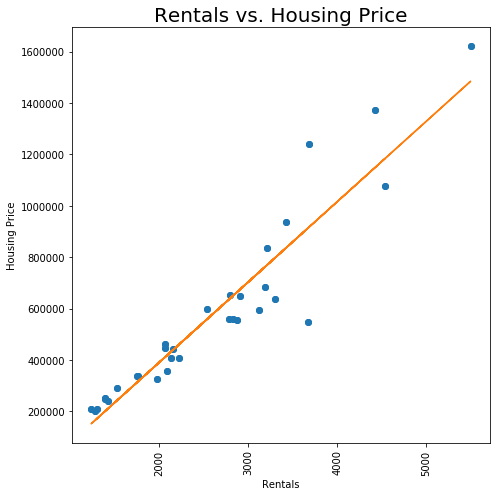

p_value: 1.68e-15
r_value: 0.94


In [26]:
fig, ax1 = plt.subplots(figsize=(7,7))
y = housing_rental_df["Price"]
x = housing_rental_df["Average 2018 Rentals"]
slope, intercept, r_value, p_value, slope_std_error = stats.linregress(x,y)
predict_y = slope * x + intercept
ax1.scatter(x, y)
plt.xticks(rotation=90)
plt.plot(x, y, 'o')
plt.plot(x, predict_y)
ax1.set_xlabel("Rentals")
ax1.set_ylabel("Housing Price")
ax1.set_title("Rentals vs. Housing Price", size =20)
fig.tight_layout()
plt.savefig ("output images/Rental_Housing_Scatter_Regression.png")
plt.show()

#round the r-value (correlation coefficient) and p-value
p_value = '{:0.2e}'.format(p_value)
r_value = '{:0.2}'.format(r_value)
print(f"p_value: {p_value}")
print(f"r_value: {r_value}")

## Read Unemployment Data

In [27]:
labor_reform = pd.read_csv("output files/labor_reform.csv", index_col=0)
labor_reform.head()

,Fresno County,Los Angeles County,San Francisco County,Shasta County
Year,,,,
2014,11.60,8.30,4.40,9.60
2015,10.20,6.60,3.60,7.80
2016,9.50,5.30,3.30,7.00
2017,8.50,4.80,2.90,5.80
2018,7.50,4.70,2.40,4.90


In [28]:
labor_change = pd.read_csv("output files/labor_change.csv", index_col=0)
labor_change.head()

,Fresno County,Los Angeles County,San Francisco County,Shasta County
Year,,,,
2014,0.09,0.51,2.38,-0.53
2015,0.50,-0.06,2.52,-0.93
2016,1.02,1.03,2.57,0.13
2017,0.07,1.09,1.57,-0.27
2018,0.70,0.78,1.97,0.13


## Plot Unemployment vs. Housing Data, 4 Counties

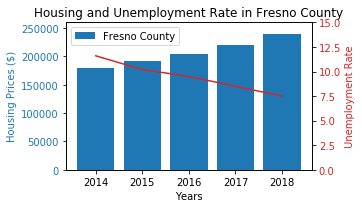

In [29]:
x_axis = labor_reform.index
y1line = zillow_df.loc[:, "Fresno County"]
y2bar = labor_reform.loc[:, "Fresno County"]

fig, ax1 = plt.subplots(figsize=(5,3))

color = 'tab:blue'
ax1.set_xlabel('Years')
ax1.set_ylim(0, 260000)
ax1.set_ylabel('Housing Prices ($)', color=color)
ax1.set_title('Housing and Unemployment Rate in Fresno County')
ax1.bar(x_axis, y1line, color=color) 
ax1.tick_params(axis='y', labelcolor=color)
ax1.legend(["Fresno County"], facecolor='w')

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
ax2.set_ylim(0, 15) #set limit on second axis to same scale as first axis
color = 'tab:red'
ax2.set_ylabel("Unemployment Rate", color=color)  # we already handled the x-label with ax1
ax2.plot(x_axis, y2bar, color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.savefig("output images/Unemployment_HousingPrices_FresnoCounty.png")
plt.show()

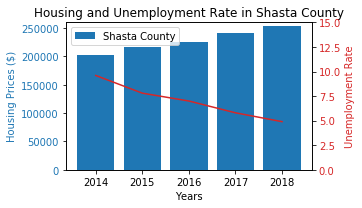

In [30]:
x_axis = labor_reform.index
y1line = zillow_df.loc[:, "Shasta County"]
y2bar = labor_reform.loc[:, "Shasta County"]


fig, ax1 = plt.subplots(figsize=(5,3))

color = 'tab:blue'
ax1.set_xlabel('Years')
ax1.set_ylim(0, 260000)
ax1.set_ylabel('Housing Prices ($)', color=color)
ax1.set_title('Housing and Unemployment Rate in Shasta County')
ax1.bar(x_axis, y1line, color=color) 
ax1.tick_params(axis='y', labelcolor=color)
ax1.legend(["Shasta County"], facecolor='w')

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
ax2.set_ylim(0, 15) #set limit on second axis to same scale as first axis
color = 'tab:red'
ax2.set_ylabel("Unemployment Rate", color=color)  # we already handled the x-label with ax1
ax2.plot(x_axis, y2bar, color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.savefig("output images/Unemployment_HousingPrices_ShastaCounty.png")
plt.show()

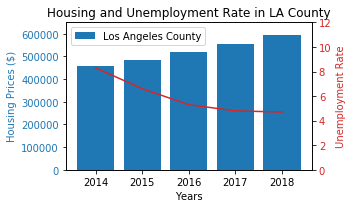

In [31]:
x_axis = labor_reform.index
y1line = zillow_df.loc[:, "Los Angeles County"]
y2bar = labor_reform.loc[:, "Los Angeles County"]

fig, ax1 = plt.subplots(figsize=(5,3))

color = 'tab:blue'
ax1.set_xlabel('Years')
ax1.set_ylim(0, 650000)
ax1.set_ylabel('Housing Prices ($)', color=color)
ax1.set_title('Housing and Unemployment Rate in LA County')
ax1.bar(x_axis, y1line, color=color) 
ax1.tick_params(axis='y', labelcolor=color)
ax1.legend(["Los Angeles County"], facecolor='w')

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
ax2.set_ylim(0, 12) #set limit on second axis to same scale as first axis
color = 'tab:red'
ax2.set_ylabel("Unemployment Rate", color=color)  # we already handled the x-label with ax1
ax2.plot(x_axis, y2bar, color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.savefig("output images/Unemployment_HousingPrices_LACounty.png")
plt.show()

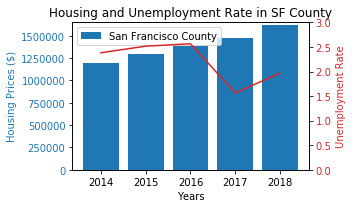

In [32]:
x_axis = labor_reform.index
y1line = zillow_df.loc[:, "San Francisco County"]
y2bar = labor_change.loc[:, "San Francisco County"]

fig, ax1 = plt.subplots(figsize=(5,3))

color = 'tab:blue'
ax1.set_xlabel('Years')
ax1.set_ylim(0, 1650000)
ax1.set_ylabel('Housing Prices ($)', color=color)
ax1.set_title('Housing and Unemployment Rate in SF County')
ax1.bar(x_axis, y1line, color=color) 
ax1.tick_params(axis='y', labelcolor=color)
ax1.legend(["San Francisco County"], facecolor='w')

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
ax2.set_ylim(0, 3) #set limit on second axis to same scale as first axis
color = 'tab:red'
ax2.set_ylabel("Unemployment Rate", color=color)  # we already handled the x-label with ax1
ax2.plot(x_axis, y2bar, color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.savefig("output images/Unemployment_HousingPrices_SFCounty.png")
plt.show()

## Plot Unemployment vs. Housing Price Scatter - all CA counties for 2018

In [33]:
#read unemployment data for all California counties for 2018
unemployment_all = pd.read_csv("output files/unemployment_all_2018_df.csv")
unemployment_all.head()

,Area Name,2018
0,Alameda County,3.00
1,Alpine County,4.60
2,Amador County,4.00
3,Butte County,4.90
4,Calaveras County,4.00


In [34]:
zillow_clean_all_counties_df = zillow_clean_all_counties_df.rename(columns = {"RegionName":"Area Name"})
zillow_clean_all_counties_df.head()

,Area Name,Price
0,Los Angeles County,596094.53
1,San Diego County,560627.31
2,Orange County,683327.61
3,Riverside County,356364.39
4,San Bernardino County,327473.67


In [35]:
joint_df = pd.merge(zillow_clean_all_counties_df,unemployment_all, how = "inner", on = "Area Name" )
joint_df.head()

,Area Name,Price,2018
0,Los Angeles County,596094.53,4.70
1,San Diego County,560627.31,3.30
2,Orange County,683327.61,2.90
3,Riverside County,356364.39,4.40
4,San Bernardino County,327473.67,4.00


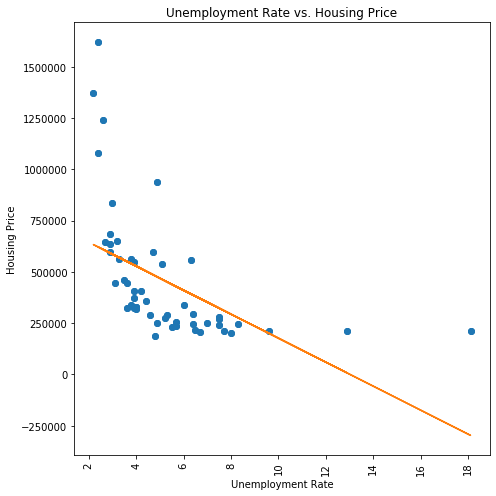

p_value: 6.72e-05
r_value: -0.52


In [36]:
fig, ax1 = plt.subplots(figsize=(7,7))
x = joint_df["2018"]
y = joint_df["Price"]
slope, intercept, r_value, p_value, slope_std_error = stats.linregress(x,y)
predict_y = slope * x + intercept
ax1.scatter(x, y)
plt.xticks(rotation=90)
plt.plot(x, y, "o")
plt.plot(x, predict_y)

ax1.set_xlabel("Unemployment Rate")
ax1.set_ylabel("Housing Price")
ax1.set_title("Unemployment Rate vs. Housing Price")
fig.tight_layout()
plt.savefig ("output images/Unemployment_Housing_Scatter_Regression.png")
plt.show()

p_value = '{:0.2e}'.format(p_value)
r_value = '{:0.2}'.format(r_value)
print(f"p_value: {p_value}")
print(f"r_value: {r_value}")

## Plot year over year housing price change

In [37]:
#read zillow data for 4 counties from 2013 - 2018
zillow_df13_18 = pd.read_csv("output files/zillow_clean_2013_2018_df.csv", encoding = "latin-1") 
zillow_df13_18.head()

,Unnamed: 0,Los Angeles County,Fresno County,San Francisco County,Shasta County
0,2013 Avg Price,418759.50,162810.31,1096593.58,175357.75
1,2014 Avg Price,456951.25,180313.22,1194854.92,202065.47
2,2015 Avg Price,482374.33,191649.06,1292884.22,216334.31
3,2016 Avg Price,518062.94,203774.64,1388945.64,226238.28
4,2017 Avg Price,555362.75,220687.50,1471771.03,241436.89


In [38]:
#calculate year over year change for each county
zillow_chg_la=zillow_df13_18["Los Angeles County"].pct_change()*100
zillow_chg_la
zillow_chg_f=zillow_df13_18["Fresno County"].pct_change()*100
zillow_chg_f
zillow_chg_sf=zillow_df13_18["San Francisco County"].pct_change()*100
zillow_chg_sf
zillow_chg_sh=zillow_df13_18["Shasta County"].pct_change()*100

In [39]:
#create dictionary of year over year change and convert to dataframe
real_estate_change = {
    "Years":[2013, 2014, 2015, 2016, 2017, 2019],
    "Los Angeles County % chg":zillow_chg_la,
    "Fresno County % chg":zillow_chg_f,
    "San Francisco County % chg":zillow_chg_sf,
    "Shasta County % chg":zillow_chg_sh
     }
re_chg_df = pd.DataFrame(real_estate_change)
re_chg_df

,Years,Los Angeles County % chg,Fresno County % chg,San Francisco County % chg,Shasta County % chg
0,2013,nan,nan,nan,nan
1,2014,9.12,10.75,8.96,15.23
2,2015,5.56,6.29,8.20,7.06
3,2016,7.40,6.33,7.43,4.58
4,2017,7.20,8.30,5.96,6.72
5,2019,7.33,8.21,10.11,4.81


In [40]:
#drop first row of nans
re_chg_df.drop([0])

,Years,Los Angeles County % chg,Fresno County % chg,San Francisco County % chg,Shasta County % chg
1,2014,9.12,10.75,8.96,15.23
2,2015,5.56,6.29,8.20,7.06
3,2016,7.40,6.33,7.43,4.58
4,2017,7.20,8.30,5.96,6.72
5,2019,7.33,8.21,10.11,4.81


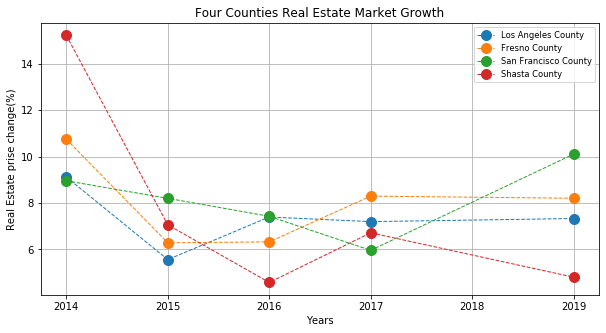

In [41]:
#plot housing prices year over year change for 4 counties
fig, ax = plt.subplots(figsize=(10,5))
x_axis = re_chg_df["Years"]
# Generate the Plot of Real Estate growth 2014 -2019

plt.plot(x_axis, re_chg_df["Los Angeles County % chg"], 
         marker="o",markersize=10, linestyle="--",linewidth=1,label ="Los Angeles County")
plt.plot(x_axis, re_chg_df["Fresno County % chg"],
         marker="o", markersize=10, linestyle="--", linewidth=1, label = "Fresno County")
plt.plot(x_axis, re_chg_df["San Francisco County % chg"],
         marker="o", markersize=10, linestyle="--", linewidth= 1, label = "San Francisco County")
plt.plot(x_axis, re_chg_df["Shasta County % chg"],
        marker="o", markersize=10, linestyle="--", linewidth=1, label = "Shasta County")
#Setting a grid
plt.grid()
#Labeling lims
plt.ylabel("Real Estate prise change(%)")
plt.xlabel("Years")
#Adding the Title
plt.title("Four Counties Real Estate Market Growth")
#Adding Legend and setting its location and size
plt.legend( loc = 1, fontsize = "small" )

# Save the Figure

plt.savefig("output images/Real_Estate_Growth.png")


In [42]:
re_chg_df14 = re_chg_df.drop ([0])
re_chg_df14

,Years,Los Angeles County % chg,Fresno County % chg,San Francisco County % chg,Shasta County % chg
1,2014,9.12,10.75,8.96,15.23
2,2015,5.56,6.29,8.20,7.06
3,2016,7.40,6.33,7.43,4.58
4,2017,7.20,8.30,5.96,6.72
5,2019,7.33,8.21,10.11,4.81


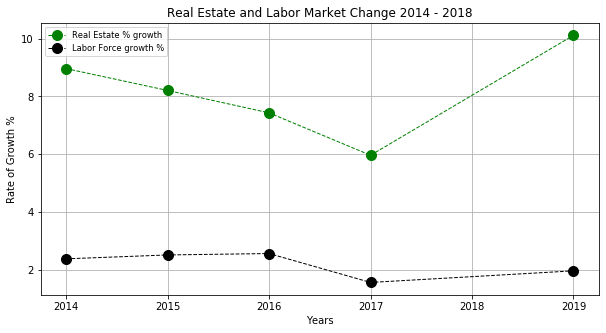

In [43]:
fig, ax = plt.subplots(figsize=(10,5))
x_axis = re_chg_df14["Years"]
# Generate the Plot to reflect SF Reat Estate Market rate of growth and SF Labor Force rate of change

plt.plot(x_axis, re_chg_df14["San Francisco County % chg"],
         color="g", marker="o", markersize=10, linestyle="--", linewidth= 1, label = "Real Estate % growth")
plt.plot(x_axis,labor_change["San Francisco County"],
        color="k", marker="o", markersize=10, linestyle="--", linewidth=1, label = "Labor Force growth %")
#Setting a grid
plt.grid()
#Labeling lims
plt.ylabel("Rate of Growth %")
plt.xlabel("Years")
#Adding the Title
plt.title("Real Estate and Labor Market Change 2014 - 2018")
#Adding Legend and setting its location and size
plt.legend( loc = 2, fontsize = "small" )

# Save the Figure

plt.savefig("output images/Real_Estate_Labor_chg.png")

plt.show()

## Read Crime Data

In [44]:
#read crime data for 4 counties
#https://openjustice.doj.ca.gov/exploration/crime-statistics/crimes-clearances
crime_county_table_df = pd.read_csv("output files/crimes_by_county_2014-2018.csv")
crime_county_table_df.head()

,Year,Fresno County,Los Angeles County,San Francisco County,Shasta County
0,2014,4547,42725,6822,1275
1,2015,5228,50466,6789,1400
2,2016,5981,56351,6269,1333
3,2017,5745,59924,6410,1225
4,2018,5889,58567,6290,1163


## Plot Crime vs. Housing Data, 4 Counties

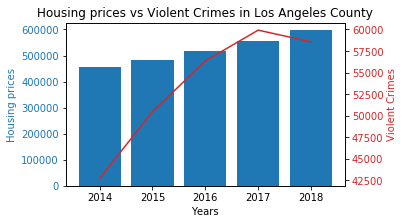

In [45]:
#plot LA County crime and housing price data with 2 y axis
x= ['2014','2015', '2016', '2017', '2018']
y1line = zillow_df["Los Angeles County"]
y2bar = crime_county_table_df["Los Angeles County"]

fig, ax1 = plt.subplots(figsize=(5,3))

color = 'tab:blue'
ax1.set_xlabel('Years')

ax1.set_ylabel('Housing prices', color=color)
ax1.set_title('Housing prices vs Violent Crimes in Los Angeles County')
ax1.bar(x, y1line, color=color)
ax1.tick_params(axis='y', labelcolor=color)
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:red'
ax2.set_ylabel('Violent Crimes', color=color)  # we already handled the x-label with ax1
ax2.plot(x, y2bar, color=color)
ax2.tick_params(axis='y', labelcolor=color)

plt.savefig("output images/Crime_Housing_Prices_LosAngeles_County.png")
plt.show()

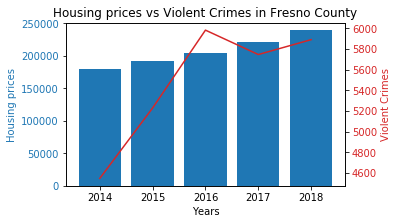

In [46]:
#plot Fresno County  nd housing price data with 2 y axis
x= ['2014','2015', '2016', '2017', '2018']
y1line = zillow_df["Fresno County"]
y2bar = crime_county_table_df["Fresno County"]

fig, ax1 = plt.subplots(figsize=(5,3))

color = 'tab:blue'
ax1.set_xlabel('Years')

ax1.set_ylabel('Housing prices', color=color)
ax1.set_title('Housing prices vs Violent Crimes in Fresno County')
ax1.bar(x, y1line, color=color)
ax1.tick_params(axis='y', labelcolor=color)
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:red'
ax2.set_ylabel('Violent Crimes', color=color)  # we already handled the x-label with ax1
ax2.plot(x, y2bar, color=color)
ax2.tick_params(axis='y', labelcolor=color)

plt.savefig("output images/Crime_Housing_Prices_Fresno_County.png")
plt.show()

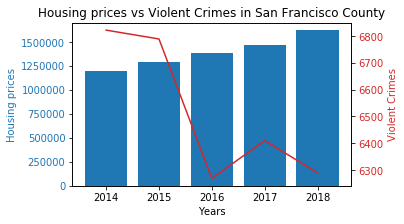

In [47]:
#plot SF County and housing price data with 2 y axis
x= ['2014','2015', '2016', '2017', '2018']
y1line = zillow_df["San Francisco County"]
y2bar = crime_county_table_df["San Francisco County"]

fig, ax1 = plt.subplots(figsize=(5,3))

color = 'tab:blue'
ax1.set_xlabel('Years')

ax1.set_ylabel('Housing prices', color=color)
ax1.set_title('Housing prices vs Violent Crimes in San Francisco County')
ax1.bar(x, y1line, color=color)
ax1.tick_params(axis='y', labelcolor=color)
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:red'
ax2.set_ylabel('Violent Crimes', color=color)  # we already handled the x-label with ax1
ax2.plot(x, y2bar, color=color)
ax2.tick_params(axis='y', labelcolor=color)

plt.savefig("output images/Crime_Housing_Prices_SanFrancisco_County.png")
plt.show()

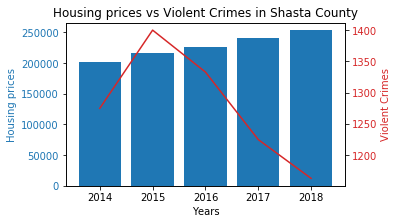

In [48]:
#plot Shasta County and housing price data with 2 y axis
x= ['2014','2015', '2016', '2017', '2018']
y1line = zillow_df["Shasta County"]
y2bar = crime_county_table_df["Shasta County"]

fig, ax1 = plt.subplots(figsize=(5,3))

color = 'tab:blue'
ax1.set_xlabel('Years')

ax1.set_ylabel('Housing prices', color=color)
ax1.set_title('Housing prices vs Violent Crimes in Shasta County')
ax1.bar(x, y1line, color=color)
ax1.tick_params(axis='y', labelcolor=color)
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:red'
ax2.set_ylabel('Violent Crimes', color=color)  # we already handled the x-label with ax1
ax2.plot(x, y2bar, color=color)
ax2.tick_params(axis='y', labelcolor=color)

plt.savefig("output images/Crime_Housing_Pricesi_Shasta_County.png")
plt.show()

## Plot Crime vs. Housing Price Scatter - all CA counties for 2018 (with outlier)

In [49]:
#read crimes for all CA counties for 2018
crime_county_2018_df = pd.read_csv("output files/crimes_all_counties_2018.csv", index_col = 0)
#Renaming column for clarity
#crime_county_2018_df = crime_data_2018.rename(columns={"Violent_sum": "Violent_Crimes"})
crime_county_2018_df.head()

,County,Year,Violent_Crimes
0,Alameda County,2018,9948
1,Alpine County,2018,12
2,Amador County,2018,118
3,Butte County,2018,1214
4,Calaveras County,2018,197


In [50]:
# Read the Pricing data
pricing_data_to_load = "output files/zillow_clean_all_counties_df.csv"
pricing_data_df = pd.read_csv(pricing_data_to_load, index_col = 0)

In [51]:
#Converting to DataFrame
pricing_all_counties_2018_df = pd.DataFrame (pricing_data_df)
pricing_all_counties_2018_df = pricing_all_counties_2018_df.reset_index()

#Renaming RegionName to County for consistency with the Crime DataFrame
pricing_all_counties_2018_df = pricing_all_counties_2018_df.rename(columns={"RegionName": "County"})
pricing_all_counties_2018_df.head()

,County,Price
0,Los Angeles County,596094.53
1,San Diego County,560627.31
2,Orange County,683327.61
3,Riverside County,356364.39
4,San Bernardino County,327473.67


In [52]:
#Merging both DataFrames
crime_price_merge_df = pd.merge(pricing_all_counties_2018_df, crime_county_2018_df, on="County", how="inner")
crime_price_merge_df = crime_price_merge_df[["County", "Violent_Crimes", "Price"]]
crime_price_merge_df.head()

,County,Violent_Crimes,Price
0,Los Angeles County,58567,596094.53
1,San Diego County,11379,560627.31
2,Orange County,7362,683327.61
3,Riverside County,7360,356364.39
4,San Bernardino County,10577,327473.67


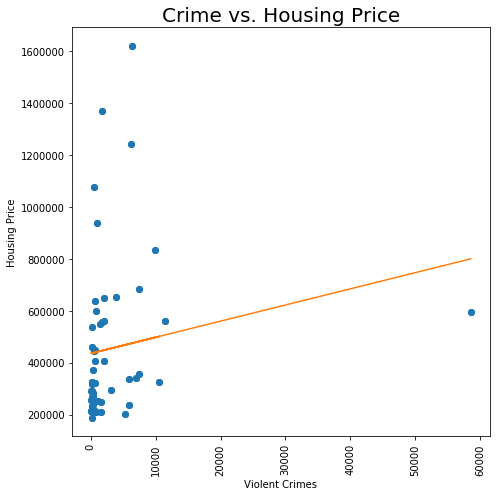

p_value: 2.33e-01
r_value: 0.17


In [53]:
#We want to explore the relationship between housing prices and crime data for all CA counties for 2018
# Show linear relationship between Crime and Housing Price

#plot scatter
fig, ax1 = plt.subplots(figsize=(7,7))
x = crime_price_merge_df["Violent_Crimes"]
y = crime_price_merge_df["Price"]
ax1.scatter(x, y)
plt.xticks(rotation=90)

#plot regression
slope, intercept, r_value, p_value, slope_std_error = stats.linregress(x,y)
predict_y = slope * x + intercept
plt.plot(x, y, "o")
plt.plot(x, predict_y)

ax1.set_xlabel("Violent Crimes")
ax1.set_ylabel("Housing Price")
ax1.set_title("Crime vs. Housing Price", size=20)
fig.tight_layout()
plt.savefig ("output images/Crime_Housing_Scatter_Regression_outlier.png")
plt.show()

#round the r-value (correlation coefficient) and p-value
p_value = '{:0.2e}'.format(p_value)
r_value = '{:0.2}'.format(r_value)

print(f"p_value: {p_value}")
print(f"r_value: {r_value}")

## Plot Crime vs. Housing Price Scatter - all CA counties for 2018 (without outlier)

In [54]:
# Dropping an outlier for Crime (LA County)
crime_price_df = crime_price_merge_df.drop([0])
crime_price_df.head()

,County,Violent_Crimes,Price
1,San Diego County,11379,560627.31
2,Orange County,7362,683327.61
3,Riverside County,7360,356364.39
4,San Bernardino County,10577,327473.67
5,Santa Clara County,6155,1241342.00


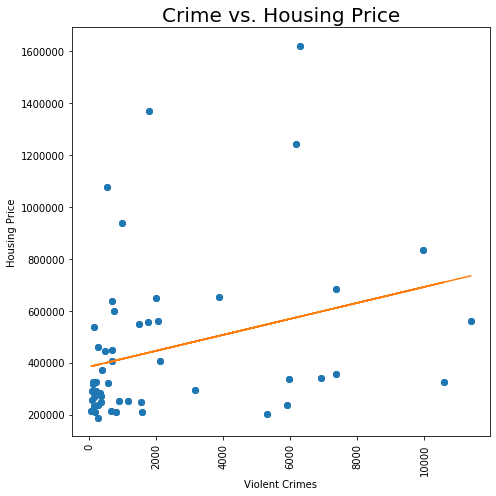

p_value: 3.15e-02
r_value: 2.99e-01


In [55]:
#plot scatter
fig, ax1 = plt.subplots(figsize=(7,7))
x = crime_price_df["Violent_Crimes"]
y = crime_price_df["Price"]
ax1.scatter(x, y)
plt.xticks(rotation=90)

#plot regression
slope, intercept, r_value, p_value, slope_std_error = stats.linregress(x,y)
predict_y = slope * x + intercept
plt.plot(x, y, "o")
plt.plot(x, predict_y)

#round the r-value (correlation coefficient) and p-value
p_value = '{:0.2e}'.format(p_value)
r_value = '{:0.2e}'.format(r_value)

ax1.set_xlabel("Violent Crimes")
ax1.set_ylabel("Housing Price")
ax1.set_title("Crime vs. Housing Price", size = 20)
fig.tight_layout()
plt.savefig ("output images/Crime_Housing_Scatter_Regression_no_outlier.png")
plt.show()

#round the r-value (correlation coefficient) and p-value
#p_value = '{:0.2e}'.format(p_value)
#r_value = '{:0.2e}'.format(r_value)
print(f"p_value: {p_value}")
print(f"r_value: {r_value}")